# [MLP Image Classification](https://github.com/kokchun/Deep-learning-AI21/blob/main/Lectures/Lec1-MLP_image_classification.ipynb)

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

In [48]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU' or x.device_type == 'CPU']

get_available_devices()

2022-04-21 11:31:10.623911: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-21 11:31:10.623938: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


['/device:CPU:0', '/device:GPU:0']

In [49]:
(X_train, y_train), (X_test, y_test) = load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## Normalize data

In [50]:
X_train.max(), X_train.min()

(255, 0)

In [51]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [52]:
scaled_X_train = X_train.astype('float32')/255
scaled_X_test = X_test.astype('float32')/255
scaled_X_test.min(), scaled_X_train.max()

(0.0, 1.0)

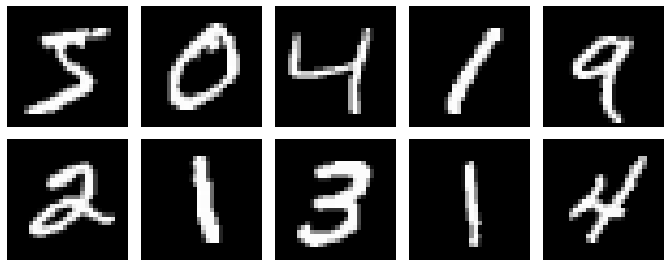

In [53]:
def display_images(data, rows=2, cols=5, figsize=(12,4)):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i, :, :], cmap='gray')
        ax.axis('off')
    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0)

display_images(X_train)

## MLP model

In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


def MLP_model(nodes=None, names=None, activations=[]):
    model = Sequential(name="MLP_model")
    model.add(Flatten(input_shape=(28, 28), name="Input_layer"))

    for node, name, activation in zip(nodes, names, activations):
        model.add(Dense(node, name=name, activation=activation))

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )

    return model


In [55]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [56]:
with tensorflow.device('/device:CPU:0'):
    model_1 = MLP_model(nodes=[10], names=['output_layer'], activations=['softmax'])
    model_1.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Flatten)       (None, 784)               0         
                                                                 
 output_layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [57]:
with tensorflow.device('/device:CPU:0'):
    model_1.fit(scaled_X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 [==============================] - 1s 519us/step - loss: 0.5092 - accuracy: 0.8667 - val_loss: 0.3083 - val_accuracy: 0.9162
Epoch 2/20
1563/1563 [==============================] - 1s 534us/step - loss: 0.3169 - accuracy: 0.9116 - val_loss: 0.2800 - val_accuracy: 0.9216
Epoch 3/20
1563/1563 [==============================] - 1s 514us/step - loss: 0.2929 - accuracy: 0.9181 - val_loss: 0.2677 - val_accuracy: 0.9246
Epoch 4/20
1563/1563 [==============================] - 1s 515us/step - loss: 0.2815 - accuracy: 0.9214 - val_loss: 0.2605 - val_accuracy: 0.9299
Epoch 5/20
1563/1563 [==============================] - 1s 491us/step - loss: 0.2737 - accuracy: 0.9228 - val_loss: 0.2557 - val_accuracy: 0.9315
Epoch 6/20
1563/1563 [==============================] - 1s 491us/step - loss: 0.2684 - accuracy: 0.9247 - val_loss: 0.2591 - val_accuracy: 0.9286
Epoch 7/20
1563/1563 [==============================] - 1s 469us/step - loss: 0.2639 - accuracy: 0.9262 - val_loss: 0.2570 -

In [58]:
metrics = pd.DataFrame(model_1.history.history)
metrics.index = range(len(metrics))
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.509217,0.86668,0.308316,0.9162
1,0.316850,0.91158,0.279970,0.9216
2,0.292917,0.91808,0.267682,0.9246
3,0.281484,0.92142,0.260512,0.9299
4,0.273719,0.92284,0.255731,0.9315


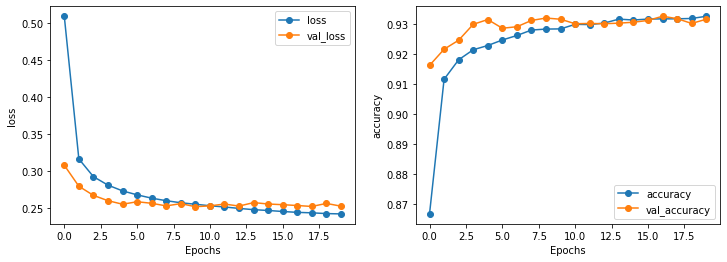

In [59]:
def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    columns = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, column in zip(axes, columns):
        df_history.plot(y=column, xlabel="Epochs", ylabel=column[0], ax=ax, style=style)

plot_metrics(metrics)

## Hidden layers

In [60]:
model_2 = MLP_model(nodes=[128,128,10], activations=['relu', 'relu', 'softmax'], names=['hidden_1', 'hidden_2', 'output'])
model_2.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 128)               100480    
                                                                 
 hidden_2 (Dense)            (None, 128)               16512     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [61]:
with tensorflow.device('/device:CPU:0'):
    model_2.fit(scaled_X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Epoch 1/20
  41/1563 [..............................] - ETA: 5s - loss: 1.4146 - accuracy: 0.5983

2022-04-21 11:31:27.082245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1549/1563 [============================>.] - ETA: 0s - loss: 0.2530 - accuracy: 0.9250

2022-04-21 11:31:32.819159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 7s 4ms/step - loss: 0.2522 - accuracy: 0.9252 - val_loss: 0.1197 - val_accuracy: 0.9639
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1048 - accuracy: 0.9687 - val_loss: 0.1012 - val_accuracy: 0.9690
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0731 - accuracy: 0.9772 - val_loss: 0.0939 - val_accuracy: 0.9725
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0559 - accuracy: 0.9822 - val_loss: 0.0975 - val_accuracy: 0.9730
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0855 - val_accuracy: 0.9783
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0936 - val_accuracy: 0.9750
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0284 - accuracy: 0.9907 - val_loss: 0.0923 - val_accuracy: 0.9772
Epo

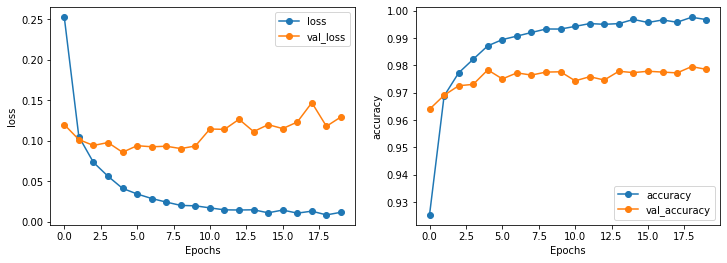

In [62]:
metrics_2 = pd.DataFrame(model_2.history.history)
metrics_2.index = range(len(metrics_2))
plot_metrics(metrics_2)

In [63]:
with tensorflow.device('/device:CPU:0'):
    model_3 = MLP_model(nodes=[128, 128, 10], activations=["relu", "relu", "softmax"], names=["Hidden_1", "Hidden_2", "Output"])

In [64]:
with tensorflow.device('/device:CPU:0'):
    model_3.fit(scaled_X_train, y_train, verbose=1, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 820us/step - loss: 0.2260 - accuracy: 0.9337
Epoch 2/5
1875/1875 [==============================] - 2s 830us/step - loss: 0.0982 - accuracy: 0.9698
Epoch 3/5
1875/1875 [==============================] - 1s 789us/step - loss: 0.0681 - accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 1s 799us/step - loss: 0.0508 - accuracy: 0.9838
Epoch 5/5
1875/1875 [==============================] - 2s 824us/step - loss: 0.0399 - accuracy: 0.9874


In [67]:
y_pred = model_3.predict(X_test)
y_pred

2022-04-21 11:34:32.425251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

2022-04-21 11:34:35.855232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.93      0.99      0.96      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.95      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000



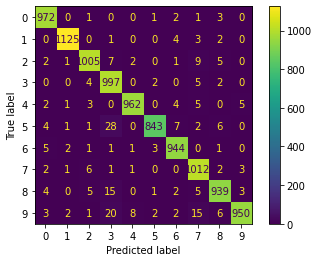

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_3.predict(scaled_X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

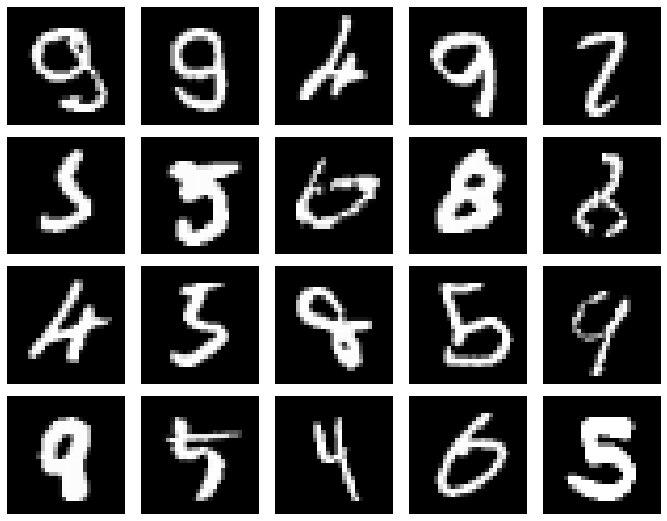

In [69]:
misclassified_indices = np.where(y_pred != y_test)
misclassified_samples = scaled_X_test[misclassified_indices]

display_images(misclassified_samples, 4,5, (12,8))